<a href="https://colab.research.google.com/github/HuyNguyen271/Project_AI/blob/main/AI_project_animal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries

from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# đoạn mã này được sử dụng để tải các tệp ảnh và nhãn tương ứng từ thư mục trên Google Drive
# chuẩn bị chúng cho việc huấn luyện mô hình học máy.
folder = '/content/drive/MyDrive/PROJECT_CUOI_KI_AI/SEA_ANIMAL/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('Bach_tuoc'):
    output= 1.0
  if file.startswith('Ca'):
    output= 2.0
  if file.startswith('Ca_heo'):
    output= 3.0
  if file.startswith('Ca_map'):
    output= 4.0
  if file.startswith('Ca_ngua'):
    output= 5.0
  if file.startswith('Ca_voi'):
    output= 6.0
  if file.startswith('cua'):
    output= 7.0
  if file.startswith('Rai_ca'):
    output= 8.0
  if file.startswith('Sao_bien'):
    output= 9.0
  if file.startswith('Tom'):
    output= 10.0
  photo = load_img(folder + file)
  photo= img_to_array(photo)

  photo = load_img(folder + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

In [ ]:
# lưu trữ các mảng numpy photos và labels
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
# save('/content/drive/MyDrive/PROJECT_CUOI_KI_AI/SEA_ANIMAL/ANIMAL_photos.npy', photos)
# save('/content/drive/MyDrive/PROJECT_CUOI_KI_AI/SEA_ANIMAL/ANIMAL_labels.npy', labels)

(5455, 40, 40, 3) (5455,)


In [ ]:
split_index = int(0.05 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape, train_x.shape)

(272, 40, 40, 3) (5183, 40, 40, 3)


In [ ]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((5183, 40, 40, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((272, 40, 40, 3))
test_x = test_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y =to_categorical( train_y,11)
test_y = to_categorical(test_y,11)
train_y.shape
test_y.shape

(272, 11)

In [ ]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 64
epochs = 100
classes = 11

In [ ]:
from keras.layers import LeakyReLU

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same')) # tích chập 32 lần mỗi lần 3 hàng 3 cột
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, (3,3), activation = 'linear', input_shape = (40, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, (3,3), activation = 'linear', input_shape = (40, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, (3,3), activation = 'linear', input_shape = (40, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(512, (3,3), activation = 'linear', input_shape = (40, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(1024, (3,3), activation = 'linear', input_shape = (40, 40, 3), padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))



In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy

model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                  

In [ ]:
#Compile:
model.compile(optimizer = Adam(), loss = categorical_crossentropy, metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs,validation_data=(train_x, train_y),verbose=1)

Epoch 1/100
81/81 [==============================] - 3s 26ms/step - loss: 1.9546 - accuracy: 0.2348 - val_loss: 1.8155 - val_accuracy: 0.3104
Epoch 2/100
81/81 [==============================] - 2s 23ms/step - loss: 1.6569 - accuracy: 0.3473 - val_loss: 1.5528 - val_accuracy: 0.4054
Epoch 3/100
81/81 [==============================] - 2s 20ms/step - loss: 1.5091 - accuracy: 0.4096 - val_loss: 1.4190 - val_accuracy: 0.4330
Epoch 4/100
81/81 [==============================] - 2s 23ms/step - loss: 1.4076 - accuracy: 0.4494 - val_loss: 1.2362 - val_accuracy: 0.5244
Epoch 5/100
81/81 [==============================] - 2s 24ms/step - loss: 1.3176 - accuracy: 0.4910 - val_loss: 1.2066 - val_accuracy: 0.5375
Epoch 6/100
81/81 [==============================] - 2s 25ms/step - loss: 1.2243 - accuracy: 0.5223 - val_loss: 1.0621 - val_accuracy: 0.5709
Epoch 7/100
81/81 [==============================] - 2s 22ms/step - loss: 1.1097 - accuracy: 0.5780 - val_loss: 1.0571 - val_accuracy: 0.5991
Epoch 

In [ ]:
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 5ms/step - loss: 5.7454 - accuracy: 0.4743
Test accuracy: 0.4742647111415863


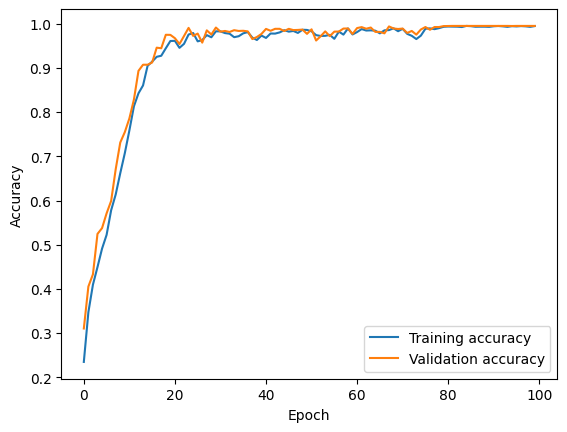

In [38]:
# plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt
plt.plot(train.history['accuracy'], label='Training accuracy')
plt.plot(train.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/PROJECT_CUOI_KI_AI/model5_animal.h5')

In [ ]:
# from tensorflow import keras
# model1 = keras.models.load_model('/content/drive/MyDrive/PROJECT_CUOI_KI_AI/model5_animal.h5/')

1/1 [==============================] - 0s 104ms/step
Cá


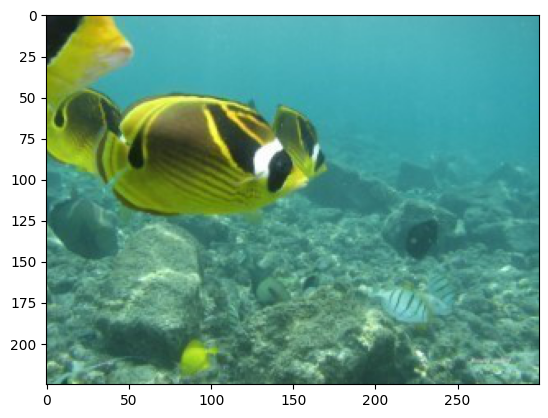

1/1 [==============================] - 0s 21ms/step
Cá Ngựa


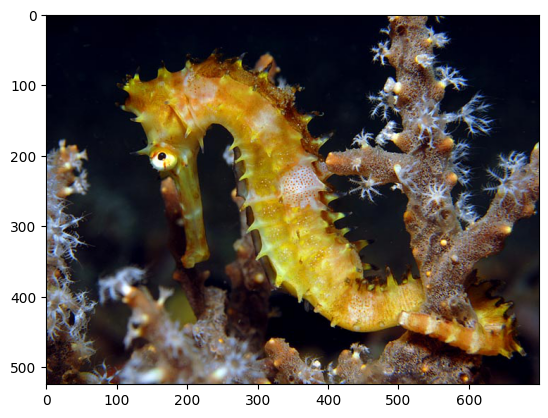

1/1 [==============================] - 0s 21ms/step
Cá Heo


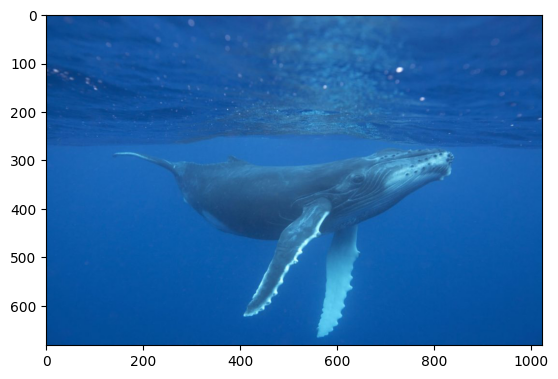

1/1 [==============================] - 0s 20ms/step
Rái Cá


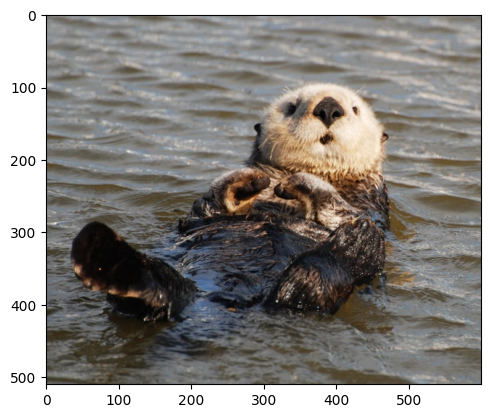

1/1 [==============================] - 0s 36ms/step
Tôm Biển


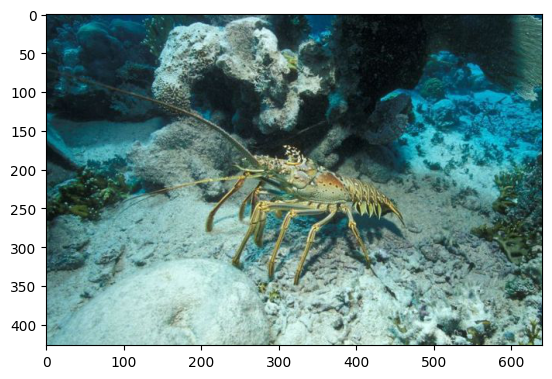

1/1 [==============================] - 0s 39ms/step
Cá Heo


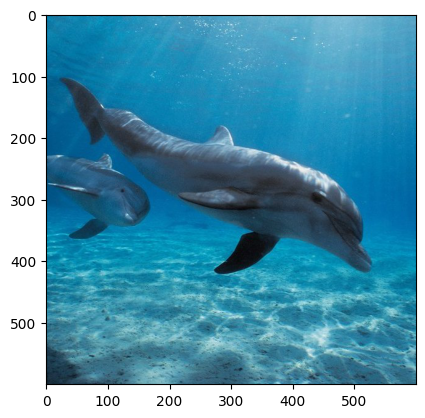

1/1 [==============================] - 0s 38ms/step
Sao Biển


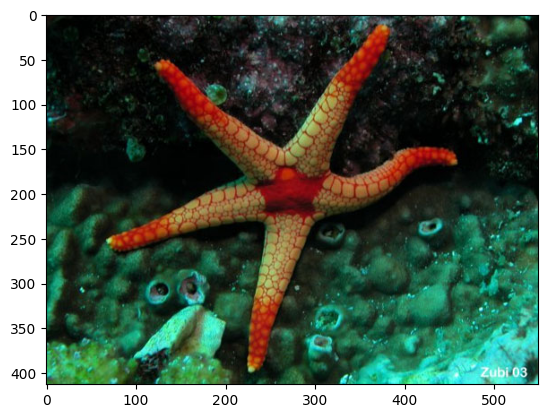

1/1 [==============================] - 0s 44ms/step
Bạch Tuộc


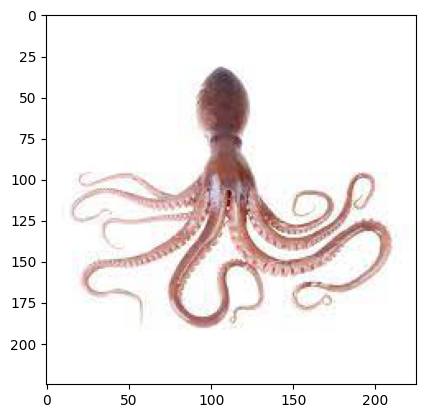

1/1 [==============================] - 0s 34ms/step
Rái Cá


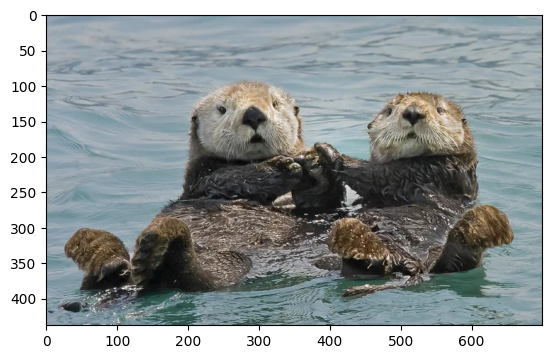

1/1 [==============================] - 0s 25ms/step
Bạch Tuộc


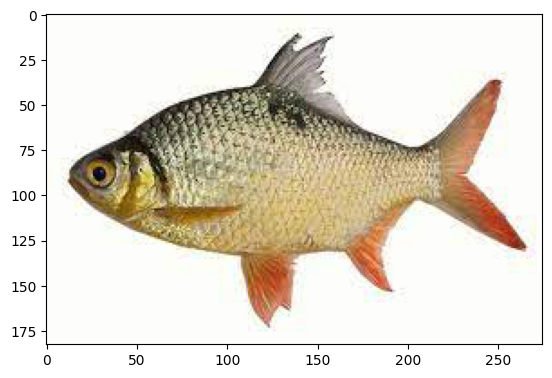

1/1 [==============================] - 0s 27ms/step
Cá Ngựa


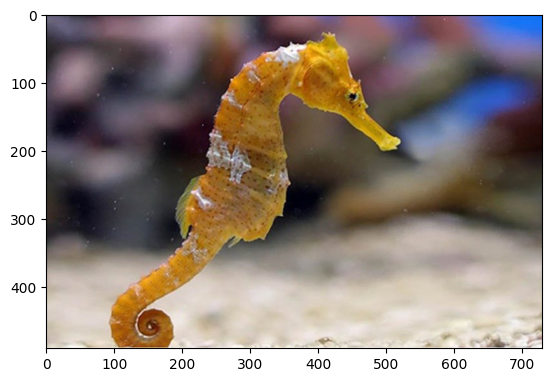

1/1 [==============================] - 0s 42ms/step
Cá Ngựa


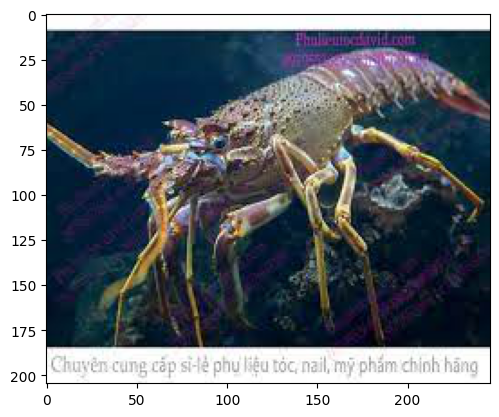

1/1 [==============================] - 0s 45ms/step
Bạch Tuộc


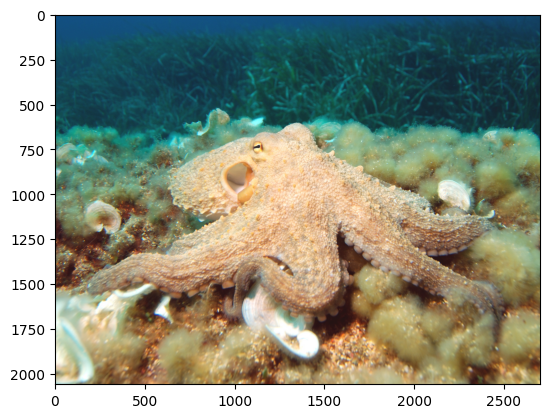

1/1 [==============================] - 0s 37ms/step
Cá Heo


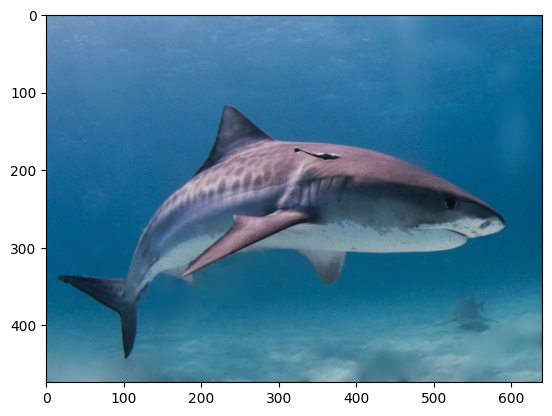

1/1 [==============================] - 0s 19ms/step



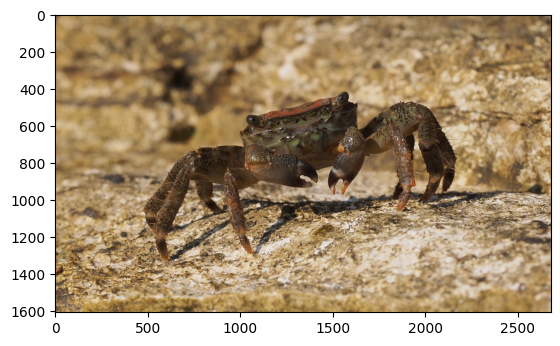

1/1 [==============================] - 0s 20ms/step



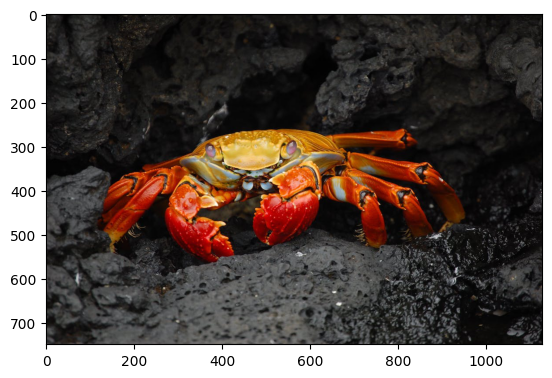

1/1 [==============================] - 0s 32ms/step
Cá Ngựa


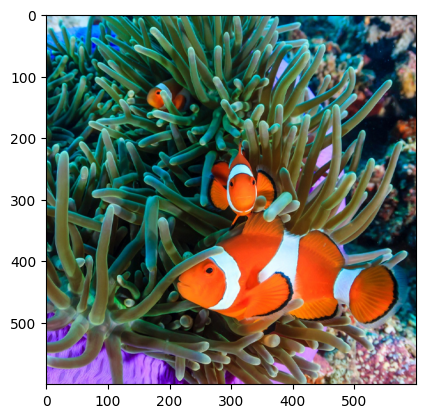

1/1 [==============================] - 0s 31ms/step
Sao Biển


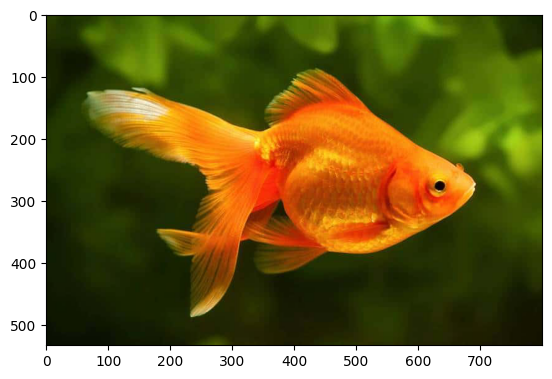

1/1 [==============================] - 0s 33ms/step
Cá Ngựa


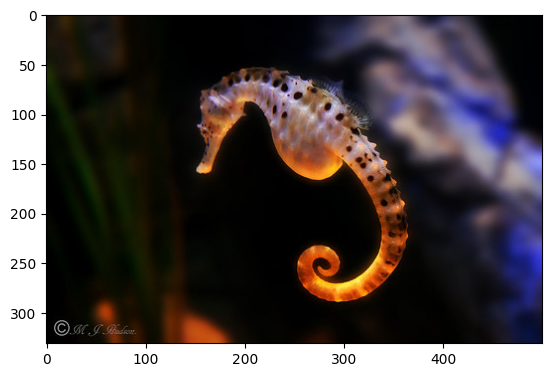

1/1 [==============================] - 0s 31ms/step



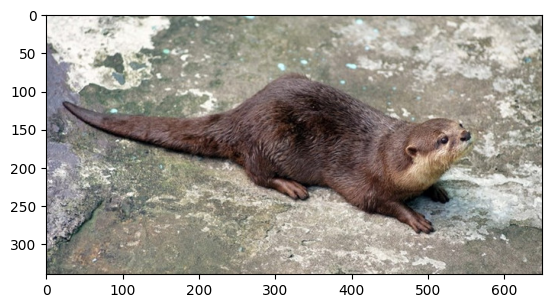

1/1 [==============================] - 0s 30ms/step
Sao Biển


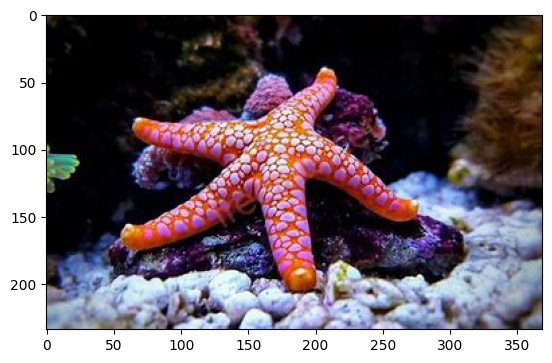

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/PROJECT_CUOI_KI_AI/ANIMAL_TEST/'
for file in listdir(folder):
  photo = load_img(folder  +  file)
  plt.imshow(photo)
  
  photo = load_img(folder +   file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','Bạch Tuộc','Cá', 'Cá Heo','Cá Mập', 'Cá Ngựa', 'Cá Voi', 'Cua', 'Rái Cá', 'Sao Biển','Tôm Biển']
  print(class_name[result])
  plt.show()